**Brian Blaylock**  
*January 13, 2021*

# Demo: Nightime IR overlay 

In [1]:
from goes2go.data import goes_latest, goes_nearesttime
from goes2go.rgb import normalize, TrueColor, NaturalColor
import matplotlib.pyplot as plt

In [2]:
# Obtain a GOES ABI multichannel image
g = goes_nearesttime('2020-12-21 12:00',
                     satellite=16, product='ABI', domain='F')

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPF    |
 |    Domain: F                |
📦 Finished downloading [1] files to [/p/home/blaylock/data/noaa-goes16/ABI-L2-MCMIPF].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

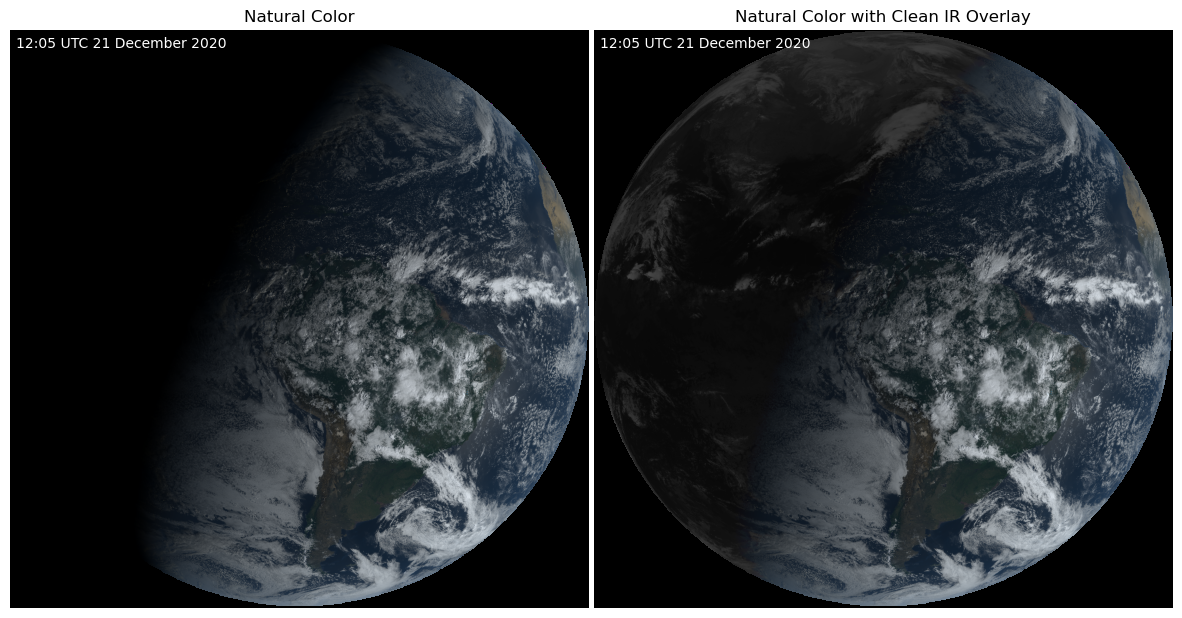

In [4]:
# I only thin it to plot the image a little quicker because the full 
# resolution of the data isn't distinguishable at the image resolution
nc = NaturalColor(g.thin(5))
ncIR = NaturalColor(g.thin(5), night_IR=True)

fig, axes = plt.subplots(1, 2, figsize=[15,8], dpi=100)

text = g.t.dt.strftime('%H:%M UTC %d %B %Y').item()

axes[0].axis('off')
axes[0].imshow(nc.NaturalColor)
axes[0].set_title('Natural Color')
axes[0].text(0.01, .97, text, color='w', transform=axes[0].transAxes)

axes[1].axis('off')
axes[1].imshow(ncIR.NaturalColor)
axes[1].set_title('Natural Color with Clean IR Overlay')
axes[1].text(0.01, .97, text, color='w', transform=axes[1].transAxes)

plt.subplots_adjust(wspace=.01)

plt.savefig(f'../docs/_static/Color-IR_demo', bbox_inches='tight')